<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/TripFare_ML%20After_Overload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **TripFare : Predicting Urban Taxi Fare with Machine Learning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Collection

df = pd.read_csv("/content/drive/MyDrive/DataSet_For DS/taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [3]:
df.shape

(212345, 18)

In [4]:
# --------------------------
# 2. Structure & Schema
# --------------------------
print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())


--- Data Types ---
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

--- Missing Values ---
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                   

In [5]:
df.nunique()

,0
VendorID,2
tpep_pickup_datetime,61208
tpep_dropoff_datetime,63607
passenger_count,7
pickup_longitude,14794
pickup_latitude,30504
RatecodeID,7
store_and_fwd_flag,2
dropoff_longitude,18029
dropoff_latitude,34903


In [ ]:
# Change dtype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Haversine formula function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to your DataFrame
df["trip_distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)


In [ ]:
import pytz

# Ensure pickup_hour is extracted
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Extract AM/PM
df['pickup_am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

# Binary flag for night trips
df['is_night'] = df['pickup_hour'].apply(
    lambda x: 1 if (x >= 22 or x <= 5) else 0
)

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Or in hours
df['trip_duration_hr'] = df['trip_duration_min'] / 60

# Drop the columns
df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

df = df.drop(columns=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"])

In [ ]:
df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_hour,pickup_am_pm,is_night,trip_duration_min,trip_duration_hr
0,1,1,1,N,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,0,AM,1,7.916667,0.131944
1,1,1,1,N,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,0,AM,1,11.100000,0.185000
2,2,2,1,N,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,0,AM,1,31.100000,0.518333
3,2,3,1,N,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,0,AM,1,0.000000,0.000000
4,2,5,3,N,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,0,AM,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,N,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,12,PM,0,23.266667,0.387778
212341,2,1,1,N,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,12,PM,0,22.750000,0.379167
212342,2,1,1,N,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,12,PM,0,2.683333,0.044722
212343,1,2,1,N,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,12,PM,0,7.150000,0.119167


In [ ]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
VendorID                        0               0
passenger_count                 9               0
RatecodeID                      0               0
payment_type                    0               0
fare_amount                    50             106
extra                      191930              19
mta_tax                       791             101
tip_amount                  73542               4
tolls_amount               200726               0
improvement_surcharge          45             106
total_amount                   38             106
trip_distance_km             2982               0
pickup_hour                  7079               0
is_night                   191030               0
trip_duration_min             130               1
trip_duration_hr              130               1


In [ ]:
# Drop rows where passenger_count == 0
df = df[df['passenger_count'] != 0]

# Drop rows where trip_duration_hr == 0
df = df[df['trip_duration_hr'] != 0]

# Drop rows where improvement_surcharge == 0
df = df[df['improvement_surcharge'] != 0]

# Drop rows where total_amount == 0
df = df[df['total_amount'] != 0]

In [ ]:
# Get numeric column names
numeric_cols = df.select_dtypes(include=['number']).columns

#  Convert all numeric values to positive
df[numeric_cols] = df[numeric_cols].abs()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
VendorID                        0               0
passenger_count                 0               0
RatecodeID                      0               0
payment_type                    0               0
fare_amount                    10               0
extra                      191771               0
mta_tax                       744               0
tip_amount                  73372               0
tolls_amount               200555               0
improvement_surcharge           0               0
total_amount                    0               0
trip_distance_km             2965               0
pickup_hour                  7067               0
is_night                   190877               0
trip_duration_min               0               0
trip_duration_hr                0               0


# **Null value Handling**

In [ ]:
df["improvement_surcharge"].unique()

array([0.3])

In [ ]:
df["mta_tax"].unique()

array([0.5, 0. ])

In [ ]:
# col1 = 'tip_amount'
#mean_val = df[col1].mean()
#df.loc[df[col1] == 0, col1] = mean_val

# col2 = "trip_distance_km"
#mean_val = df[col2].mean()
#df.loc[df[col2] == 0, col2] = mean_val

#col3 = "fare_amount"
#mean_val = df[col3].mean()
#df.loc[df[col3] == 0, col3] = mean_val


In [ ]:
df.drop(columns=["improvement_surcharge"],inplace=True)

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                   Zero_Count  Negative_Count
VendorID                    0               0
passenger_count             0               0
RatecodeID                  0               0
payment_type                0               0
fare_amount                10               0
extra                  191771               0
mta_tax                   744               0
tip_amount              73372               0
tolls_amount           200555               0
total_amount                0               0
trip_distance_km         2965               0
pickup_hour              7067               0
is_night               190877               0
trip_duration_min           0               0
trip_duration_hr            0               0


In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_distance_km', 'pickup_hour',
       'pickup_am_pm', 'is_night', 'trip_duration_min', 'trip_duration_hr'],
      dtype='object')

In [ ]:
df.shape

(212163, 17)

In [ ]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = code.fit_transform(df[i])

In [ ]:
df


,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance_km,pickup_hour,pickup_am_pm,is_night,trip_duration_min,trip_duration_hr
0,1,1,1,0,1,9.0,0.5,0.5,2.05,0.0,12.35,3.138096,0,0,1,7.916667,0.131944
1,1,1,1,0,1,11.0,0.5,0.5,3.05,0.0,15.35,4.303331,0,0,1,11.100000,0.185000
2,2,2,1,0,1,54.5,0.5,0.5,8.00,0.0,63.80,16.600142,0,0,1,31.100000,0.518333
7,1,1,1,0,3,20.5,0.5,0.5,0.00,0.0,21.80,7.950066,0,0,1,16.050000,0.267500
8,1,1,1,0,1,5.5,0.5,0.5,2.00,0.0,8.80,0.837395,0,0,1,4.983333,0.083056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,0,1,16.0,0.0,0.5,3.36,0.0,20.16,3.806279,12,1,0,23.266667,0.387778
212341,2,1,1,0,1,15.5,0.0,0.5,2.00,0.0,18.30,3.496576,12,1,0,22.750000,0.379167
212342,2,1,1,0,1,4.0,0.0,0.5,0.00,0.0,4.80,0.580119,12,1,0,2.683333,0.044722
212343,1,2,1,0,2,7.0,0.0,0.5,0.00,0.0,7.80,1.555737,12,1,0,7.150000,0.119167


In [ ]:
# --------------------------
# 3. Distribution & Skewness
# --------------------------

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df[col].skew()
    kurt_val = df[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: VendorID
  Skewness: -0.918
  Kurtosis: -1.156
  ⚠ Not normal (may need transformation)

Column: passenger_count
  Skewness: 1.886
  Kurtosis: 2.146
  ⚠ Not normal (may need transformation)

Column: RatecodeID
  Skewness: 129.531
  Kurtosis: 37173.037
  ⚠ Not normal (may need transformation)

Column: store_and_fwd_flag
  Skewness: 17.998
  Kurtosis: 321.918
  ⚠ Not normal (may need transformation)

Column: payment_type
  Skewness: 0.926
  Kurtosis: -0.422
  ⚠ Not normal (may need transformation)

Column: fare_amount
  Skewness: 6.096
  Kurtosis: 203.790
  ⚠ Not normal (may need transformation)

Column: extra
  Skewness: 2.754
  Kurtosis: 5.660
  ⚠ Not normal (may need transformation)

Column: mta_tax
  Skewness: -16.798
  Kurtosis: 280.175
  ⚠ Not normal (may need transformation)

Column: tip_amount
  Skewness: 7.667
  Kurtosis: 352.206
  ⚠ Not normal (may need transformation)

Column: tolls_amount
  Skewness: 164.852
  Kurtosis: 53102.167
  ⚠ Not normal (may need transformati

In [ ]:
# Transformation

# Methods (lambda values for Box-Cox)
methods = [0, 0.5, -0.5, -1, 1, 2, -2]

# Loop through numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    print(f"\n=== Column: {col} ===")

    # Box-Cox requires positive values
    if (df[col] <= 0).any():
        print("❌ Skipped (contains zero or negative values)")
        continue

    for j in methods:
        # Apply Box-Cox
        transformed = boxcox(df[col], lmbda=j)

        # Calculate skewness and kurtosis
        skew_val = pd.Series(transformed).skew()
        kurt_val = pd.Series(transformed).kurtosis()

        print(f"λ = {j}:  skew = {skew_val:.3f}, kurtosis = {kurt_val:.3f}")


=== Column: VendorID ===
λ = 0:  skew = -0.918, kurtosis = -1.156
λ = 0.5:  skew = -0.918, kurtosis = -1.156
λ = -0.5:  skew = -0.918, kurtosis = -1.156
λ = -1:  skew = -0.918, kurtosis = -1.156
λ = 1:  skew = -0.918, kurtosis = -1.156
λ = 2:  skew = -0.918, kurtosis = -1.156
λ = -2:  skew = -0.918, kurtosis = -1.156

=== Column: passenger_count ===
λ = 0:  skew = 1.428, kurtosis = 0.516
λ = 0.5:  skew = 1.654, kurtosis = 1.289
λ = -0.5:  skew = 1.239, kurtosis = -0.106
λ = -1:  skew = 1.101, kurtosis = -0.548
λ = 1:  skew = 1.886, kurtosis = 2.146
λ = 2:  skew = 2.293, kurtosis = 3.919
λ = -2:  skew = 0.962, kurtosis = -0.994

=== Column: RatecodeID ===
λ = 0:  skew = 8.026, kurtosis = 76.341
λ = 0.5:  skew = 13.155, kurtosis = 549.864
λ = -0.5:  skew = 7.172, kurtosis = 54.402
λ = -1:  skew = 6.779, kurtosis = 46.224
λ = 1:  skew = 129.531, kurtosis = 37173.037
λ = 2:  skew = 458.200, kurtosis = 210681.385
λ = -2:  skew = 6.488, kurtosis = 40.588

=== Column: store_and_fwd_flag ===


In [ ]:
df["passenger_count"] = boxcox(df["passenger_count"], lmbda=-2)
df["RatecodeID"] = boxcox(df["RatecodeID"], lmbda=-2)
df["total_amount"] = boxcox(df["total_amount"], lmbda=0)
df["trip_duration_min"] = boxcox(df["trip_duration_min"], lmbda=0)
df["trip_duration_hr"] = boxcox(df["trip_duration_hr"], lmbda=0)

In [ ]:
# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df[col].skew()
    kurt_val = df[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: VendorID
  Skewness: -0.918
  Kurtosis: -1.156
  ⚠ Not normal (may need transformation)

Column: passenger_count
  Skewness: 0.962
  Kurtosis: -0.994
  ⚠ Not normal (may need transformation)

Column: RatecodeID
  Skewness: 6.488
  Kurtosis: 40.588
  ⚠ Not normal (may need transformation)

Column: store_and_fwd_flag
  Skewness: 17.998
  Kurtosis: 321.918
  ⚠ Not normal (may need transformation)

Column: payment_type
  Skewness: 0.926
  Kurtosis: -0.422
  ⚠ Not normal (may need transformation)

Column: fare_amount
  Skewness: 6.096
  Kurtosis: 203.790
  ⚠ Not normal (may need transformation)

Column: extra
  Skewness: 2.754
  Kurtosis: 5.660
  ⚠ Not normal (may need transformation)

Column: mta_tax
  Skewness: -16.798
  Kurtosis: 280.175
  ⚠ Not normal (may need transformation)

Column: tip_amount
  Skewness: 7.667
  Kurtosis: 352.206
  ⚠ Not normal (may need transformation)

Column: tolls_amount
  Skewness: 164.852
  Kurtosis: 53102.167
  ⚠ Not normal (may need transformation)


In [ ]:
import pandas as pd

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df, "total_amount")
print(outliers)


        VendorID  passenger_count  RatecodeID  store_and_fwd_flag  \
2              2         0.375000       0.000                   0   
18             2         0.444444       0.375                   0   
28             2         0.000000       0.375                   0   
64             2         0.000000       0.375                   0   
65             2         0.000000       0.000                   0   
...          ...              ...         ...                 ...   
212164         2         0.000000       0.375                   0   
212215         1         0.000000       0.375                   0   
212230         2         0.375000       0.375                   0   
212243         1         0.000000       0.000                   0   
212258         2         0.375000       0.000                   0   

        payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2                  1         54.5    0.5      0.5        8.00          0.00   
18           

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["total_amount"]))
outliers = df[z_scores > 3]
print(outliers)


        VendorID  passenger_count  RatecodeID  store_and_fwd_flag  \
462            2            0.375    0.444444                   0   
478            2            0.000    0.444444                   0   
583            2            0.000    0.480000                   0   
1545           2            0.375    0.444444                   0   
1985           2            0.000    0.000000                   0   
...          ...              ...         ...                 ...   
211451         1            0.000    0.444444                   1   
211681         2            0.000    0.444444                   0   
211800         2            0.000    0.444444                   0   
212084         1            0.000    0.480000                   0   
212121         1            0.000    0.000000                   0   

        payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
462                1         57.0    0.0      0.0       13.96         12.50   
478          

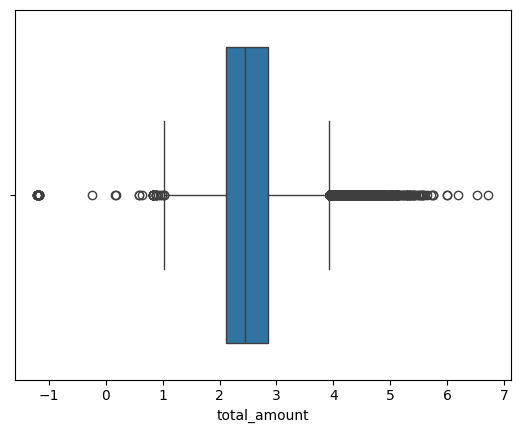

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["total_amount"])
plt.show()

In [ ]:
# --------------------------
# 4. Outliers Detection (Numeric Columns)
# --------------------------
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# ** Preprocessing**

**Feature Engineering**

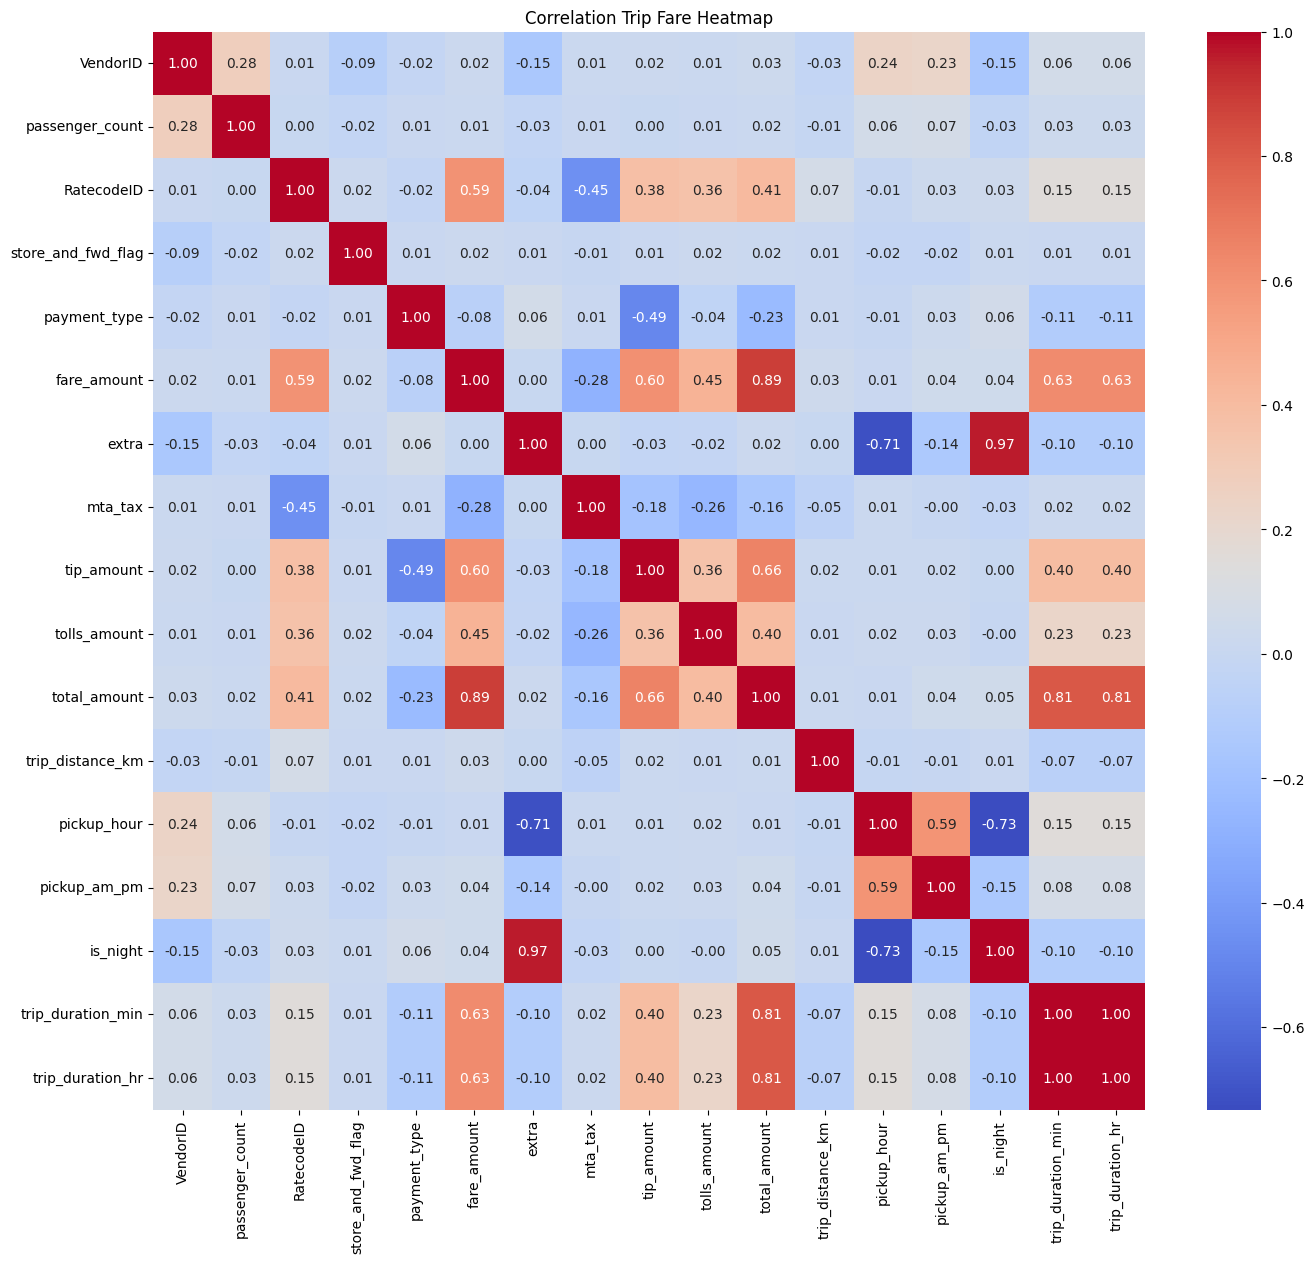

In [ ]:

df_copy = df.copy()


# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_copy.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()



# **Hypothesis testing**

In [ ]:
df.to_csv("taxi_fare_cleaned.csv")

In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_distance_km', 'pickup_hour',
       'pickup_am_pm', 'is_night', 'trip_duration_min', 'trip_duration_hr'],
      dtype='object')

In [ ]:
continous = ['fare_amount', 'extra','mta_tax','tip_amount','tolls_amount', 'total_amount',
             'trip_distance_km', 'trip_duration_min','trip_duration_hr']

catergory = ['VendorID','passenger_count', 'RatecodeID','store_and_fwd_flag','pickup_am_pm',
             'payment_type','is_night','pickup_hour']

# **Data Transformation**

In [ ]:

from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [ ]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [ ]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True


In [ ]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [ ]:
final_df = pd.DataFrame(final)
final_df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance_km,pickup_hour,pickup_am_pm,is_night,trip_duration_min,trip_duration_hr
VendorID,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0
passenger_count,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0
RatecodeID,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0
store_and_fwd_flag,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0
payment_type,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0
fare_amount,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
extra,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
mta_tax,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
tip_amount,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tolls_amount,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<Axes: >

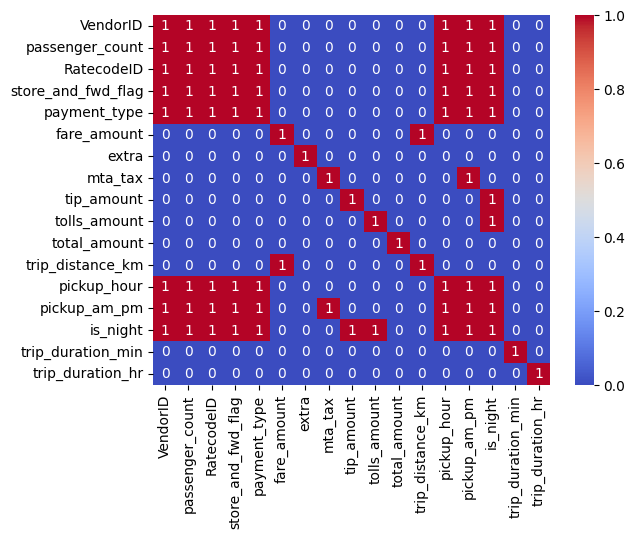

In [ ]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Train the model ML**

In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_distance_km', 'pickup_hour',
       'pickup_am_pm', 'is_night', 'trip_duration_min', 'trip_duration_hr'],
      dtype='object')

In [ ]:
df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance_km,pickup_hour,pickup_am_pm,is_night,trip_duration_min,trip_duration_hr
0,1,0.000,0.0,0,1,9.0,0.5,0.5,2.05,0.0,2.513656,3.138096,0,0,1,2.068970,-2.025374
1,1,0.000,0.0,0,1,11.0,0.5,0.5,3.05,0.0,2.731115,4.303331,0,0,1,2.406945,-1.687399
2,2,0.375,0.0,0,1,54.5,0.5,0.5,8.00,0.0,4.155753,16.600142,0,0,1,3.437208,-0.657137
7,1,0.000,0.0,0,3,20.5,0.5,0.5,0.00,0.0,3.081910,7.950066,0,0,1,2.775709,-1.318636
8,1,0.000,0.0,0,1,5.5,0.5,0.5,2.00,0.0,2.174752,0.837395,0,0,1,1.606099,-2.488246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,0.000,0.0,0,1,16.0,0.0,0.5,3.36,0.0,3.003700,3.806279,12,1,0,3.147022,-0.947323
212341,2,0.000,0.0,0,1,15.5,0.0,0.5,2.00,0.0,2.906901,3.496576,12,1,0,3.124565,-0.969779
212342,2,0.000,0.0,0,1,4.0,0.0,0.5,0.00,0.0,1.568616,0.580119,12,1,0,0.987060,-3.107285
212343,1,0.375,0.0,0,2,7.0,0.0,0.5,0.00,0.0,2.054124,1.555737,12,1,0,1.967112,-2.127232


In [ ]:
y = df['total_amount']
x = df.drop('total_amount',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159122, 16), (53041, 16), (159122,), (53041,))

In [ ]:
# Step 1
# Check for infinite values in x_train
print(x_train.columns[np.isinf(x_train).any()])

Index([], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.0005736386345309624
0.00025144146634259413
8.421363601626929e-05
0.9997686140532072


In [ ]:
# Model 1
from sklearn.svm import SVR
model1 = SVR().fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))